Loading MNIST dataset...
Dataset shape: (70000, 784) Labels shape: (70000,)
Training samples: 50400
Validation samples: 12600
Test samples: 7000


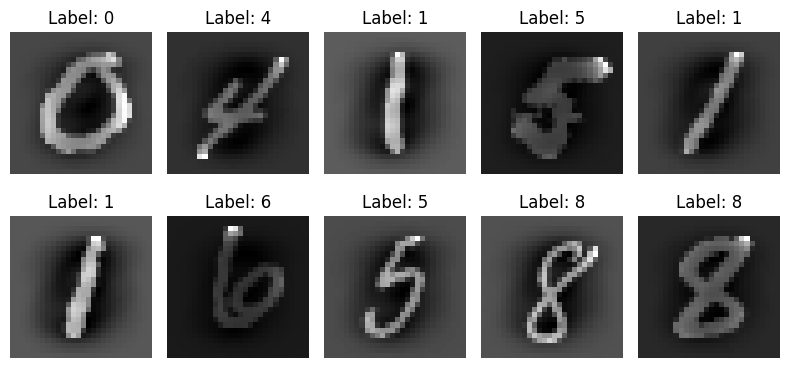


Starting validation loop...

Validation Round 1 ...
Validation Accuracy (Round 1): 90.89%
Validation Round 2 ...
Validation Accuracy (Round 2): 90.72%
Validation Round 3 ...
Validation Accuracy (Round 3): 90.91%

Best Validation Accuracy: 90.91269841269842 %

Evaluating on test data...

--- Test Results ---
Accuracy  : 90.50%
Precision : 90.40%
Recall    : 90.42%
F1 Score  : 90.40%

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       683
           1       0.94      0.97      0.96       800
           2       0.87      0.88      0.88       674
           3       0.89      0.87      0.88       760
           4       0.89      0.91      0.90       611
           5       0.87      0.86      0.86       658
           6       0.93      0.93      0.93       677
           7       0.92      0.93      0.92       724
           8       0.88      0.84      0.86       693
           9       0.89      0.89      0

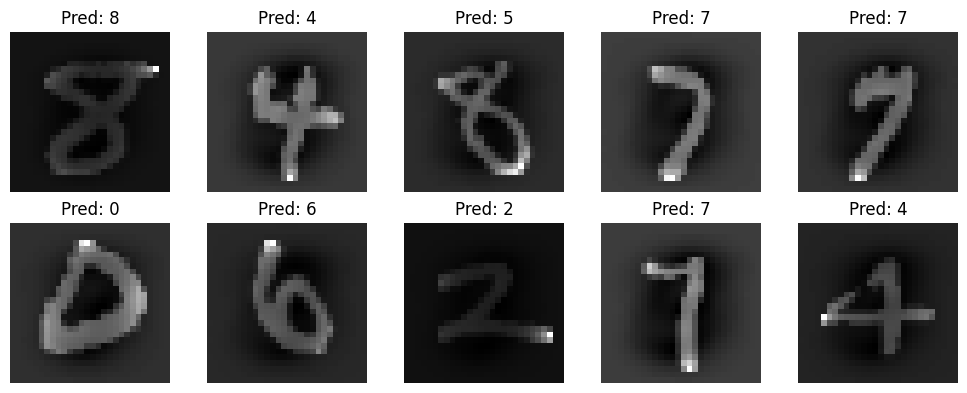

In [18]:
# -------------------------------------------------------------
# MNIST Digit Recognition using scikit-learn (with validation loop)
# Fixed convergence, scaling, and warnings
# -------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Load the MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist.data
y = mnist.target.astype('int')

print("Dataset shape:", X.shape, "Labels shape:", y.shape)

# Step 2: Normalize pixel values (0–255 → 0–1)
X = X / 255.0

# Step 3: Scale features (StandardScaler improves convergence for Logistic Regression)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Split data into Train, Validation, and Test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Step 5: Display sample digits (scaled back for visualization)
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 6: Initialize Logistic Regression model
model = LogisticRegression(max_iter=500, solver='lbfgs')  # Increased iterations & removed deprecated argument

# Step 7: Validation loop
best_acc = 0
best_model = None

print("\nStarting validation loop...\n")
for i in range(3):   # Run multiple training-validation cycles
    print(f"Validation Round {i+1} ...")

    # Shuffle and split the data differently each time
    X_tr, X_val_split, y_tr, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=i)

    # Train model
    model.fit(X_tr, y_tr)

    # Validate model
    y_pred_val = model.predict(X_val_split)
    acc_val = accuracy_score(y_val_split, y_pred_val)

    print(f"Validation Accuracy (Round {i+1}): {acc_val * 100:.2f}%")

    # Save the best model
    if acc_val > best_acc:
        best_acc = acc_val
        best_model = model

print("\nBest Validation Accuracy:", best_acc * 100, "%")

# Step 8: Evaluate on test data
print("\nEvaluating on test data...")
y_pred_test = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test, average='macro')
rec = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

print("\n--- Test Results ---")
print(f"Accuracy  : {acc * 100:.2f}%")
print(f"Precision : {prec * 100:.2f}%")
print(f"Recall    : {rec * 100:.2f}%")
print(f"F1 Score  : {f1 * 100:.2f}%")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_test))

# Step 9: Visualize predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


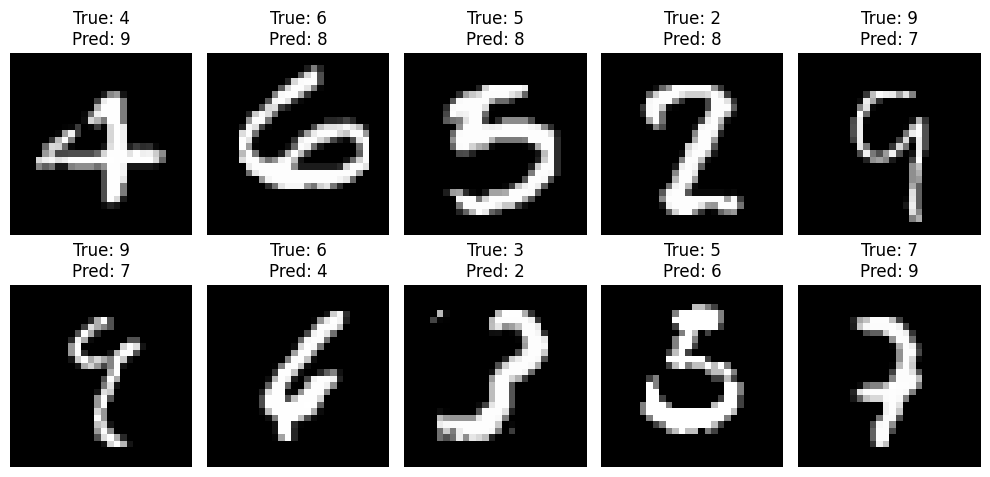

In [19]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.0  # Normalize pixel values
y = y.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train perceptron
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Find misclassified indices
misclassified = (y_pred != y_test)

# Show first 10 misclassified images
plt.figure(figsize=(10, 5))
for i, idx in enumerate([i for i, x in enumerate(misclassified) if x][:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test.iloc[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
